In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataframe = pd.read_csv('fuel.csv', encoding='ISO-8859-1')
dataframe.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


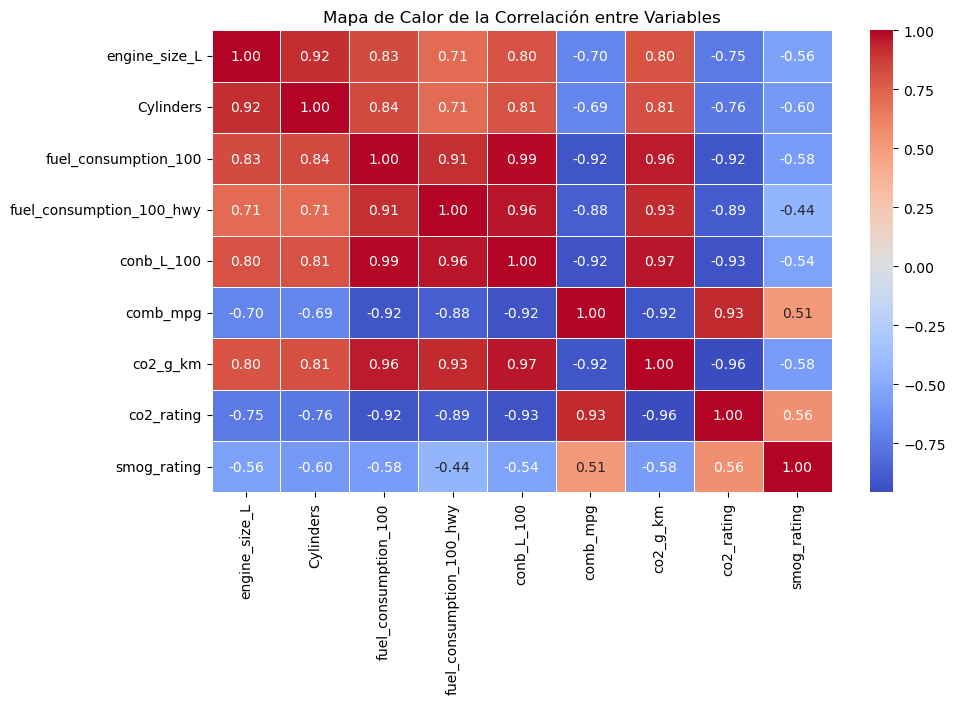

In [3]:

# # Crear el codificador
# encoder = LabelEncoder()
# # Aplicar transformación
# df_fuel_consumption["Transmission"] = encoder.fit_transform(df_fuel_consumption["Transmission"])
dataframe = dataframe.rename(columns={'Vehicle Class': 'veicle_class','Engine Size (L)': 'engine_size_L', 'Fuel Type': 'fuel_type','Fuel Consumption (L/100Km)': 'fuel_consumption_100','Hwy (L/100 km)': 'fuel_consumption_100_hwy', 'Comb (L/100 km)': 'conb_L_100', 'Comb (mpg)': 'comb_mpg', 'CO2 Emissions (g/km)': 'co2_g_km','CO2 Rating': 'co2_rating', 'Smog Rating': 'smog_rating' })


columnas_interes = ['engine_size_L', 'Cylinders', 'fuel_consumption_100','fuel_consumption_100_hwy', 'conb_L_100',  'comb_mpg', 'co2_g_km', 'co2_rating', 'smog_rating']
dataframe_limpio = dataframe[columnas_interes]
dataframe_limpio

corr = dataframe_limpio.corr()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()



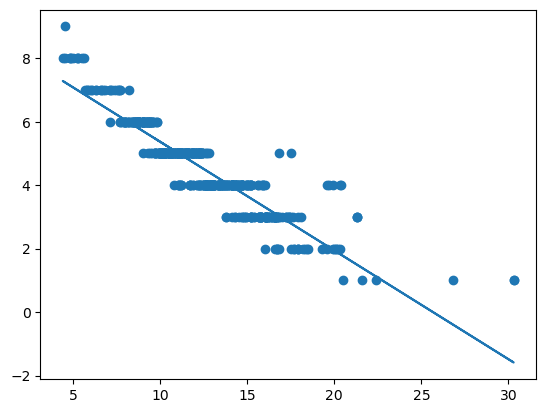

In [4]:
x = dataframe_limpio[['fuel_consumption_100']].values
y = dataframe['co2_rating']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train))
plt.show()

In [5]:
engine = np.array([[7.5]])  # Importante que esté en formato 2D
litros_estimados = regressor.predict(engine)

print(f"El gasto estimado es de {litros_estimados[0]:,.2f}")

El gasto estimado es de 6.22


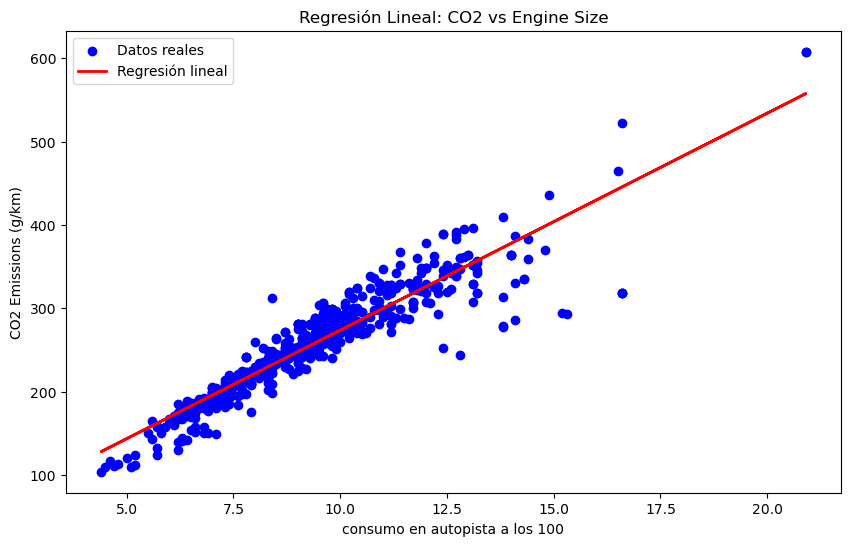

Coeficiente: 26.035768223052898
Intercepto: 13.519240893300946


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar datos
dataframe = pd.read_csv('fuel.csv', encoding='ISO-8859-1')

# Seleccionar característica (Engine Size) y variable objetivo (CO2 Emissions)
X = dataframe[['Hwy (L/100 km)']]
y = dataframe['CO2 Emissions (g/km)']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Entrenar modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicciones
y_pred = regressor.predict(X_test)

# Graficar en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('consumo en autopista a los 100')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Regresión Lineal: CO2 vs Engine Size')
plt.legend()
plt.show()

# Imprimir coeficientes del modelo
print("Coeficiente:", regressor.coef_[0])
print("Intercepto:", regressor.intercept_)
